<img style="float: right;" src="../htwlogo.jpg">

# Hough transformation

**Author**: _Erik Rodner_<br>
**Lecture**: Computer Vision and Machine Learning I

Hough transformation is a fundamental technique for detecting lines as well as circles in images.

In [50]:
# import our usual friends
from skimage.io import imread, imsave
import matplotlib.pylab as plt
import numpy as np
import skimage.data as examples
from skimage.color import rgb2gray
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line

# some code that allows us to find the simulation code
import sys
import os
sys.path.append(os.path.join("..", "utils"))

## Getting edge pixels

Let's simply detect edge pixel candidates by using the Canny detector first

In [59]:
# Constructing test image
edges = np.zeros((200, 200))
idx = np.arange(25, 175)
edges[idx, idx] = 255
edges[line(45, 25, 25, 175)] = 255
edges[line(25, 135, 175, 155)] = 255
img = edges

In [103]:
# alternative test image
img = examples.checkerboard()
# another alternative test image
img = examples.brick()
edges = feature.canny(img, sigma=3)

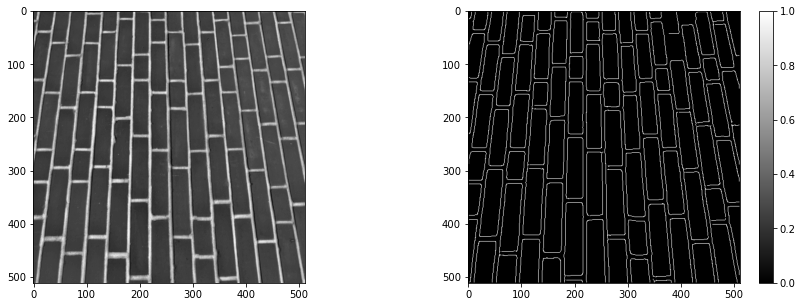

In [104]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title("edge points")
plt.subplot(1,2,2)
plt.imshow(edges, cmap=plt.cm.gray)
plt.title("input image")
plt.colorbar()

### Hough transformation

Let us first compute the hough space.

In [106]:
h_accu, angles, distances = hough_line(edges)

In [107]:
# the following is just for showing proper
# axes labels for the hough accumulation array
# you can ignore this, since it is not relevant for understanding
# hough transformations

angle_step = 0.5 * np.rad2deg(np.diff(angles).mean())
d_step = 0.5 * np.diff(d).mean()
bounds = (np.rad2deg(angles[0]) - angle_step,
          np.rad2deg(angles[-1]) + angle_step,
          d[-1] + d_step, d[0] - d_step)

Let us now find the local peaks in the hough space. The function ```hough_line_peaks``` has quite a lot of parameters to control non-maximum suppression etc.

In [98]:
p_h_accu, p_angles, p_distances = hough_line_peaks(h_accu, angles, distances, num_peaks=10)

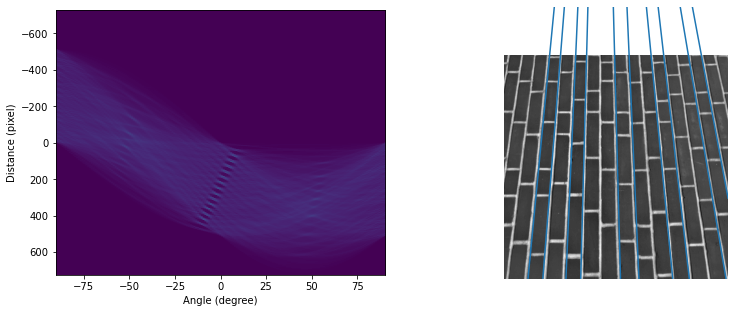

In [99]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
ax = axes.ravel()

ax[0].imshow(h_accu, extent=bounds, aspect=.1)
ax[0].set_xlabel('Angle (degree)')
ax[0].set_ylabel('Distance (pixel)')

# Show the image and visualize the lines
ax[1].imshow(img, cmap=plt.cm.gray)
for angle, dist in zip(p_angles, p_distances):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[1].axline((x0, y0), slope=np.tan(angle + np.pi/2))
ax[1].set_axis_off()
plt.show()